In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from typing import Dict, Tuple

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import cross_validate, KFold, RepeatedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import validation_curve, learning_curve

# 1. Подготовка

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv', sep=",")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data[data.duplicated(keep=False)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## 1.1. Исследование зависимостей

In [8]:
def show_dependencies(data):
    fig, ax = plt.subplots(2,3,figsize=(15,10))
    sns.countplot(ax=ax[0][0], x = 'gender', data = data, hue = 'lunch')
    sns.countplot(ax=ax[0][1], x = 'race/ethnicity', data = data, hue = 'lunch')
    sns.countplot(ax=ax[0][2], x = 'test preparation course', data = data, hue = 'lunch')
    sns.countplot(ax=ax[1][0], x = 'parental level of education', data = data, hue = 'lunch')
    sns.scatterplot(ax=ax[1][1], x = 'reading score', y = 'math score', data = data, hue = 'lunch')
    sns.scatterplot(ax=ax[1][2], x = 'writing score', y = 'reading score', data = data, hue = 'lunch')
    
    plt.setp(ax[1][0].xaxis.get_majorticklabels(), rotation=45)
    plt.show()

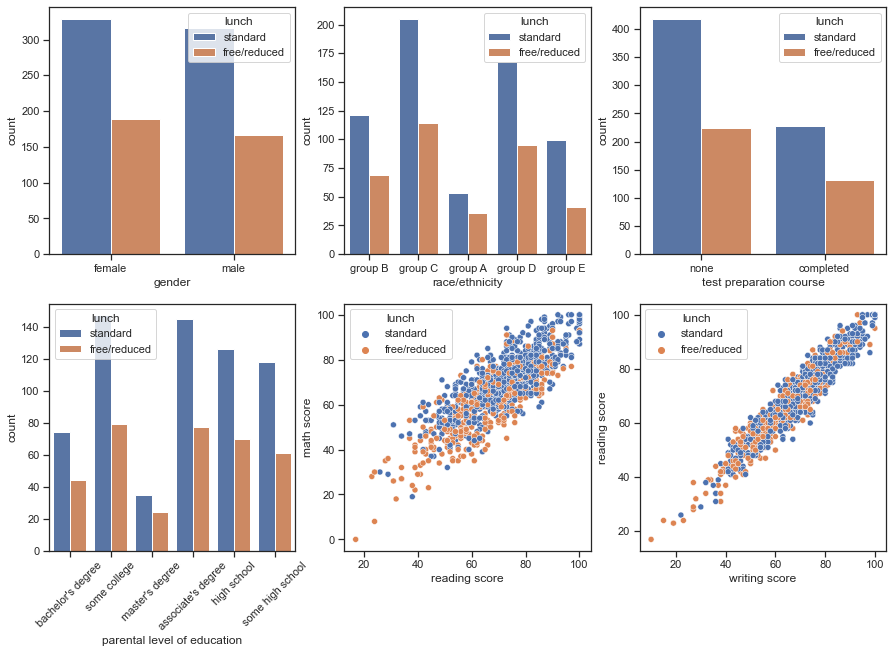

In [9]:
show_dependencies(data)

## 1.2. Проверка значений признаков

In [10]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
data['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

# 2. Множество объектов - все категориальные признаки и math score

In [14]:
def get_encoding_features(data):
    data = pd.get_dummies(data, drop_first=True)
    data.rename(columns={'lunch_standard': 'lunch'}, inplace=True)
    return data

In [15]:
dataMath = data.drop(columns=['reading score', 'writing score'])
dataMath = get_encoding_features(dataMath)

In [16]:
sc = MinMaxScaler()
dataMath['math score'] = sc.fit_transform(dataMath[['math score']]) 

In [17]:
dataMath.head()

,math score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch,test preparation course_none
0,0.72,0,1,0,0,0,1,0,0,0,0,1,1
1,0.69,0,0,1,0,0,0,0,0,1,0,1,0
2,0.90,0,1,0,0,0,0,0,1,0,0,1,1
3,0.47,1,0,0,0,0,0,0,0,0,0,0,1
4,0.76,1,0,1,0,0,0,0,0,1,0,1,1


In [18]:
TEST_SIZE = 0.2
RANDOM_STATE = 0

In [19]:
def get_train_test(data):
    data_X = data.drop(columns='lunch')
    data_Y = data['lunch']
    return train_test_split(data_X, data_Y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [20]:
dataMath_X_train, dataMath_X_test, \
dataMath_Y_train, dataMath_Y_test = get_train_test(dataMath)

In [21]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [22]:
print_class_proportions(dataMath_Y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 277 	 	 34.62%
1 	 523 	 	 65.38%


In [23]:
print_class_proportions(dataMath_Y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 78 	 	 39.0%
1 	 122 	 	 61.0%


In [24]:
print_class_proportions(dataMath['lunch'])

Метка 	 Количество 	 Процент встречаемости
0 	 355 	 	 35.5%
1 	 645 	 	 64.5%


## 2.1. Обучение с произвольным K

In [25]:
N_DEFAULT = 5 # произвольное K

In [26]:
def print_metrics(X_train, Y_train, X_test, Y_test, criteria='balanced_accuracy', K=N_DEFAULT):
    ret = 0
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, Y_train)
    target = clf.predict(X_test)
    if criteria=='balanced_accuracy':
        ret = balanced_accuracy_score(Y_test, target)
        print(f'Сбалансированная оценка: {ret}')
        plot_precision_recall_curve(clf, X_test, Y_test)
    elif criteria=='accuracy':
        ret = accuracy_score(Y_test, target)
        print(f'Обычная оценка: {ret}')
        plot_roc_curve(clf, X_test, Y_test)
    else:
        raise IOError('Неверный критерий. Ожидается "balanced_accuracy" или "accuracy"')
    plt.show()
    print(f'Матрица ошибок:\n {confusion_matrix(Y_test, target)}')
    print(classification_report(Y_test, target, target_names=['free/reduced', 'standard']))
    return ret

Сбалансированная оценка: 0.4965321563682219


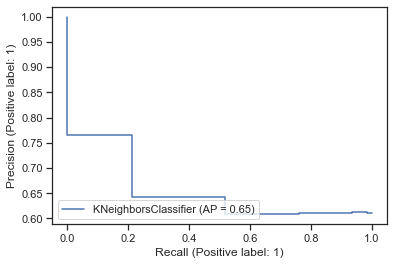

Матрица ошибок:
 [[18 60]
 [29 93]]
              precision    recall  f1-score   support

free/reduced       0.38      0.23      0.29        78
    standard       0.61      0.76      0.68       122

    accuracy                           0.56       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.52      0.56      0.52       200



In [27]:
any_res_for_Math = print_metrics(dataMath_X_train, dataMath_Y_train, dataMath_X_test, dataMath_Y_test)

## 2.2. Кросс-валидация и подбор гиперпараметра K

In [28]:
SPLITS_DEFAULT = 5
N_REP = 2

In [29]:
# перечисляем основные параметры для GridSearchCV
estimator_dis = KNeighborsClassifier()
grid_dis = {"n_neighbors":np.arange(1,50)}

In [30]:
def print_gridResults(grid, strategy):
    print(f'\nСТРАТЕГИЯ {strategy}')
    print(f'Подобранный параметр: {grid.best_params_}')
    print(f'Оценка при подобранном параметре: {grid.best_score_}')
    return [grid.best_params_["n_neighbors"], grid.best_score_]

In [31]:
def get_res_cross_val(data_X, data_Y, scoring_dis='balanced_accuracy'):
    if scoring_dis == 'balanced_accuracy':
        cv_KFold_dis = StratifiedKFold(n_splits=SPLITS_DEFAULT)
        KFold_dis = GridSearchCV(estimator_dis, grid_dis, scoring=scoring_dis, cv=cv_KFold_dis)
        KFold_dis.fit(data_X, data_Y)
        grid = print_gridResults(KFold_dis, 'Stratified K-fold')
        cv_RepeatedKFold_dis = RepeatedStratifiedKFold(n_splits=SPLITS_DEFAULT, n_repeats=N_REP, random_state=RANDOM_STATE)
        RepeatedKFold_dis = GridSearchCV(estimator_dis, grid_dis, scoring=scoring_dis, cv=cv_RepeatedKFold_dis)
        RepeatedKFold_dis.fit(data_X, data_Y)
        grid_rep = print_gridResults(RepeatedKFold_dis, f'Stratified Repeated K-fold: кол-во поторений: {N_REP}')
    elif scoring_dis == 'accuracy':
        cv_KFold_dis = KFold(n_splits=SPLITS_DEFAULT)
        KFold_dis = GridSearchCV(estimator_dis, grid_dis, scoring=scoring_dis, cv=cv_KFold_dis)
        KFold_dis.fit(data_X, data_Y)
        grid = print_gridResults(KFold_dis, 'K-fold')
        cv_RepeatedKFold_dis = RepeatedKFold(n_splits=SPLITS_DEFAULT, n_repeats=N_REP, random_state=RANDOM_STATE)
        RepeatedKFold_dis = GridSearchCV(estimator_dis, grid_dis, scoring=scoring_dis, cv=cv_RepeatedKFold_dis)
        RepeatedKFold_dis.fit(data_X, data_Y)
        grid_rep = print_gridResults(RepeatedKFold_dis, f'Repeated K-fold: кол-во поторений: {N_REP}')
    cv_ShuffleSplit_dis = ShuffleSplit(n_splits=SPLITS_DEFAULT, test_size=1/SPLITS_DEFAULT, random_state=RANDOM_STATE)
    ShuffleSplit_dis = GridSearchCV(estimator_dis, grid_dis, scoring=scoring_dis, cv=cv_ShuffleSplit_dis)
    ShuffleSplit_dis.fit(data_X, data_Y)
    grid_shuffle = print_gridResults(ShuffleSplit_dis, f'Shuffle Split: кол-во перемешиваний {SPLITS_DEFAULT} для ' +
                                    f'тестовой выборки с долей {1/SPLITS_DEFAULT}')
    return grid, grid_rep, grid_shuffle

In [32]:
grid_for_Math, REPgrid_for_Math, SHUFgrid_for_Math = get_res_cross_val(dataMath_X_train, dataMath_Y_train)


СТРАТЕГИЯ Stratified K-fold
Подобранный параметр: {'n_neighbors': 2}
Оценка при подобранном параметре: 0.5771003996003995

СТРАТЕГИЯ Stratified Repeated K-fold: кол-во поторений: 2
Подобранный параметр: {'n_neighbors': 4}
Оценка при подобранном параметре: 0.5568448218448219

СТРАТЕГИЯ Shuffle Split: кол-во перемешиваний 5 для тестовой выборки с долей 0.2
Подобранный параметр: {'n_neighbors': 2}
Оценка при подобранном параметре: 0.5943368508534446


### 2.2.1. K-fold cross validation

Сбалансированная оценка: 0.5161832702816309


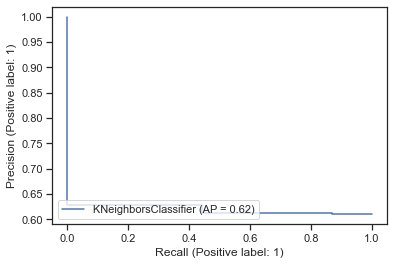

Матрица ошибок:
 [[46 32]
 [68 54]]
              precision    recall  f1-score   support

free/reduced       0.40      0.59      0.48        78
    standard       0.63      0.44      0.52       122

    accuracy                           0.50       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.54      0.50      0.50       200



In [33]:
t_grid_for_Math = print_metrics(dataMath_X_train, dataMath_Y_train, dataMath_X_test, dataMath_Y_test, K=grid_for_Math[0])

### 2.2.2. Repeated K-fold cross validation

Сбалансированная оценка: 0.5294241277847835


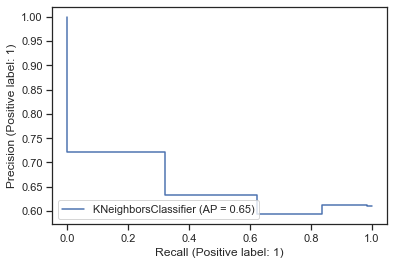

Матрица ошибок:
 [[34 44]
 [46 76]]
              precision    recall  f1-score   support

free/reduced       0.42      0.44      0.43        78
    standard       0.63      0.62      0.63       122

    accuracy                           0.55       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.55      0.55      0.55       200



In [34]:
t_Repeated_grid_for_Math = print_metrics(dataMath_X_train, dataMath_Y_train, dataMath_X_test, dataMath_Y_test, \
                                         K=REPgrid_for_Math[0])

### 2.2.3. Shuffle Split cross validation

Сбалансированная оценка: 0.5161832702816309


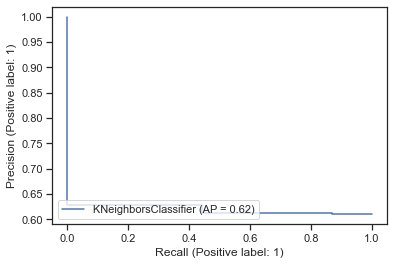

Матрица ошибок:
 [[46 32]
 [68 54]]
              precision    recall  f1-score   support

free/reduced       0.40      0.59      0.48        78
    standard       0.63      0.44      0.52       122

    accuracy                           0.50       200
   macro avg       0.52      0.52      0.50       200
weighted avg       0.54      0.50      0.50       200



In [35]:
t_ShuffleSplit_grid_for_Math = print_metrics(dataMath_X_train, dataMath_Y_train, dataMath_X_test, dataMath_Y_test, \
                                            K=SHUFgrid_for_Math[0])

In [36]:
def plot_validation_curve(data_X, data_Y):
    param_range = np.arange(1, 100, 5)
    train_scores, test_scores = validation_curve(estimator=estimator_dis, X=data_X, y=data_Y,
                                                param_name='n_neighbors', param_range=param_range, cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(7,5))
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='тренировочная верность')
    plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='проверочная верность')
    plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('Параметр K')
    plt.ylabel('Верность')
    plt.show()

In [37]:
def plot_learning_curve(data_X, data_Y, n=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator=KNeighborsClassifier(n_neighbors=n), X=data_X, 
                                                            y=data_Y,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(7,5))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label=f'тренировочная верность, k={n}')
    plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, 
             label=f'проверочная верность, k={n}')
    plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
    plt.grid()
    plt.legend(loc='upper right')
    plt.xlabel('Число тренировочных образцов')
    plt.ylabel('Верность')
    plt.show()

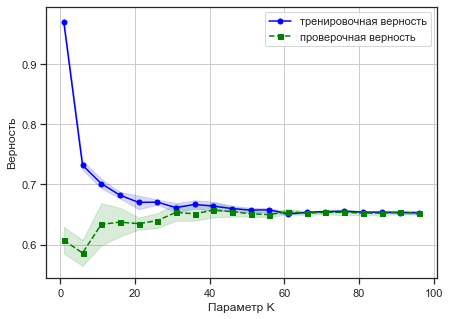

In [38]:
plot_validation_curve(dataMath_X_train, dataMath_Y_train)

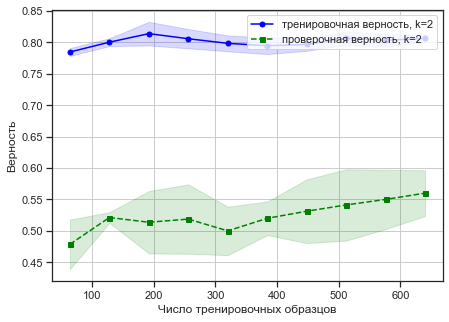

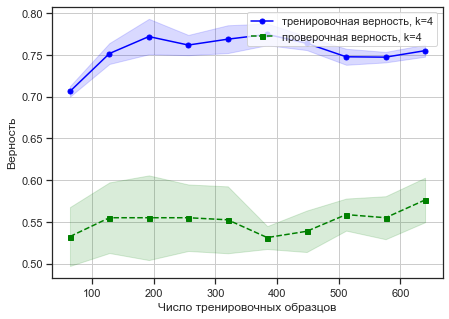

In [39]:
plot_learning_curve(dataMath_X_train, dataMath_Y_train, n=2)  
plot_learning_curve(dataMath_X_train, dataMath_Y_train, n=4)

## 2.3 Балансирование обучающего набора

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [41]:
def get_balance(X_train, Y_train, method, strategy):
    if method=='under':
        rus = RandomUnderSampler(random_state=RANDOM_STATE, sampling_strategy=strategy)
        return rus.fit_resample(X_train, Y_train)
    elif method=='over':
        ros = RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy=strategy)
        return ros.fit_resample(X_train, Y_train)
    else:
        raise IOError('Неверный метод. Ожидается "under" или "over".')

### 2.3.1. Undersampling

In [42]:
dataMathUnder_X_train, dataMathUnder_Y_train = get_balance(dataMath_X_train, dataMath_Y_train, 'under', 1)

In [43]:
print_class_proportions(dataMathUnder_Y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 277 	 	 50.0%
1 	 277 	 	 50.0%


Результат для произвольного K:
Обычная оценка: 0.515


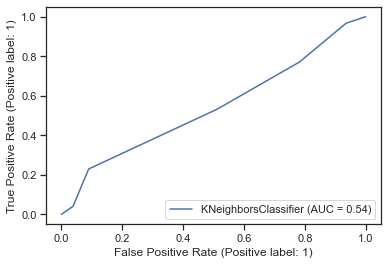

Матрица ошибок:
 [[38 40]
 [57 65]]
              precision    recall  f1-score   support

free/reduced       0.40      0.49      0.44        78
    standard       0.62      0.53      0.57       122

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.53      0.52      0.52       200



In [44]:
print('Результат для произвольного K:')
any_res_for_MathUn = print_metrics(dataMathUnder_X_train, dataMathUnder_Y_train, dataMath_X_test, 
                                 dataMath_Y_test, criteria='accuracy')

In [45]:
grid_for_MathUn, REPgrid_for_MathUn, SHUFgrid_for_MathUn = get_res_cross_val(dataMathUnder_X_train, 
                                                                             dataMathUnder_Y_train, 'accuracy')


СТРАТЕГИЯ K-fold
Подобранный параметр: {'n_neighbors': 2}
Оценка при подобранном параметре: 0.44178542178542185

СТРАТЕГИЯ Repeated K-fold: кол-во поторений: 2
Подобранный параметр: {'n_neighbors': 48}
Оценка при подобранном параметре: 0.5795167895167894

СТРАТЕГИЯ Shuffle Split: кол-во перемешиваний 5 для тестовой выборки с долей 0.2
Подобранный параметр: {'n_neighbors': 33}
Оценка при подобранном параметре: 0.5747747747747748


**K-fold cross validation**

Обычная оценка: 0.475


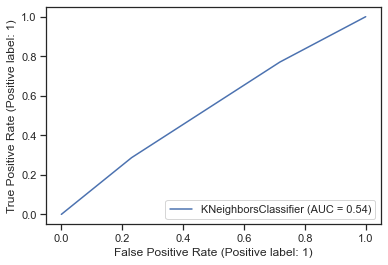

Матрица ошибок:
 [[60 18]
 [87 35]]
              precision    recall  f1-score   support

free/reduced       0.41      0.77      0.53        78
    standard       0.66      0.29      0.40       122

    accuracy                           0.48       200
   macro avg       0.53      0.53      0.47       200
weighted avg       0.56      0.47      0.45       200



In [46]:
t_grid_for_MathUn = print_metrics(dataMathUnder_X_train, dataMathUnder_Y_train, dataMath_X_test, dataMath_Y_test, 
                                  'accuracy', K=grid_for_MathUn[0])

**Repeated K-fold cross validation**

Обычная оценка: 0.59


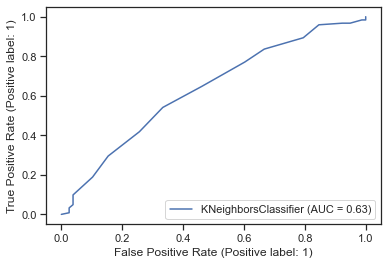

Матрица ошибок:
 [[52 26]
 [56 66]]
              precision    recall  f1-score   support

free/reduced       0.48      0.67      0.56        78
    standard       0.72      0.54      0.62       122

    accuracy                           0.59       200
   macro avg       0.60      0.60      0.59       200
weighted avg       0.63      0.59      0.59       200



In [47]:
t_Repeated_grid_for_MathUn = print_metrics(dataMathUnder_X_train, dataMathUnder_Y_train, dataMath_X_test, dataMath_Y_test,
                                        'accuracy', K=REPgrid_for_MathUn[0])

**Shuffle Split cross validation**

Обычная оценка: 0.65


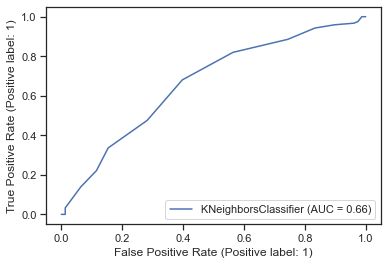

Матрица ошибок:
 [[47 31]
 [39 83]]
              precision    recall  f1-score   support

free/reduced       0.55      0.60      0.57        78
    standard       0.73      0.68      0.70       122

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.66      0.65      0.65       200



In [48]:
t_ShuffleSplit_grid_for_MathUn = print_metrics(dataMathUnder_X_train, dataMathUnder_Y_train, dataMath_X_test, dataMath_Y_test,
                                            'accuracy', K=SHUFgrid_for_MathUn[0])

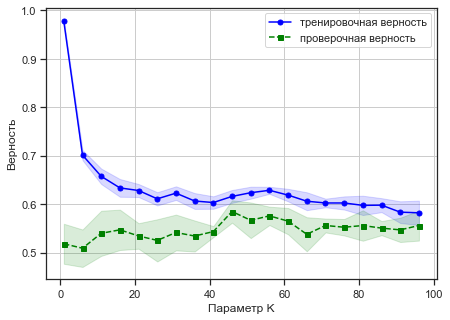

In [49]:
plot_validation_curve(dataMathUnder_X_train, dataMathUnder_Y_train)

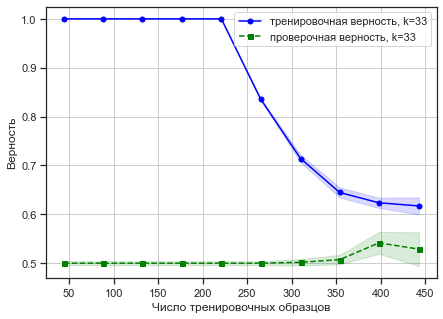

In [90]:
plot_learning_curve(dataMathUnder_X_train, dataMathUnder_Y_train, n=33)

### 2.3.2. Oversampling

In [51]:
dataMathOver_X_train, dataMathOver_Y_train = get_balance(dataMath_X_train, dataMath_Y_train, 'over', 1)

In [52]:
print_class_proportions(dataMathOver_Y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 523 	 	 50.0%
1 	 523 	 	 50.0%


Результат для произвольного K:
Обычная оценка: 0.5


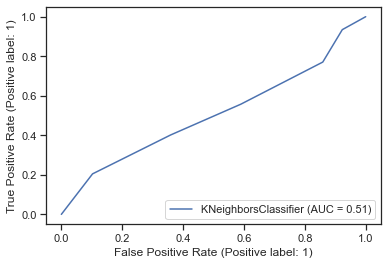

Матрица ошибок:
 [[32 46]
 [54 68]]
              precision    recall  f1-score   support

free/reduced       0.37      0.41      0.39        78
    standard       0.60      0.56      0.58       122

    accuracy                           0.50       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.51      0.50      0.50       200



In [53]:
print('Результат для произвольного K:')
any_res_for_MathOv = print_metrics(dataMathOver_X_train, dataMathOver_Y_train, dataMath_X_test, 
                                   dataMath_Y_test, criteria='accuracy')

In [54]:
grid_for_MathOv, REPgrid_for_MathOv, SHUFgrid_for_MathOv = get_res_cross_val(dataMathOver_X_train, 
                                                                             dataMathOver_Y_train, 'accuracy')


СТРАТЕГИЯ K-fold
Подобранный параметр: {'n_neighbors': 1}
Оценка при подобранном параметре: 0.7486352244246981

СТРАТЕГИЯ Repeated K-fold: кол-во поторений: 2
Подобранный параметр: {'n_neighbors': 1}
Оценка при подобранном параметре: 0.7309022556390976

СТРАТЕГИЯ Shuffle Split: кол-во перемешиваний 5 для тестовой выборки с долей 0.2
Подобранный параметр: {'n_neighbors': 1}
Оценка при подобранном параметре: 0.7142857142857144


**K-fold cross validation**

Обычная оценка: 0.535


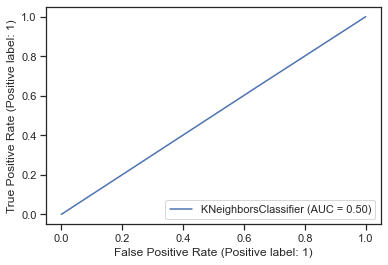

Матрица ошибок:
 [[27 51]
 [42 80]]
              precision    recall  f1-score   support

free/reduced       0.39      0.35      0.37        78
    standard       0.61      0.66      0.63       122

    accuracy                           0.54       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.53      0.54      0.53       200



In [55]:
t_grid_for_MathOv = print_metrics(dataMathOver_X_train, dataMathOver_Y_train, dataMath_X_test, dataMath_Y_test, 
                                  'accuracy', K=grid_for_MathOv[0])

**Repeated K-fold cross validation**

Обычная оценка: 0.545


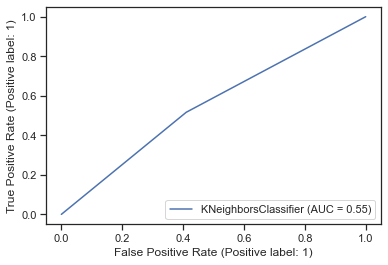

Матрица ошибок:
 [[46 32]
 [59 63]]
              precision    recall  f1-score   support

free/reduced       0.44      0.59      0.50        78
    standard       0.66      0.52      0.58       122

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.58      0.55      0.55       200



In [56]:
t_Repeated_grid_for_MathOv = print_metrics(dataMathUnder_X_train, dataMathUnder_Y_train, dataMath_X_test, dataMath_Y_test,
                                        'accuracy', K=REPgrid_for_MathOv[0])

**Shuffle Split cross validation**

Обычная оценка: 0.545


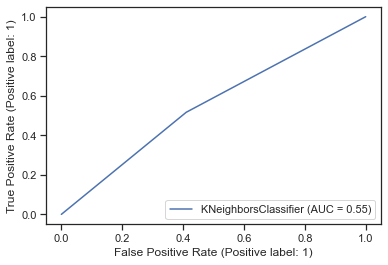

Матрица ошибок:
 [[46 32]
 [59 63]]
              precision    recall  f1-score   support

free/reduced       0.44      0.59      0.50        78
    standard       0.66      0.52      0.58       122

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.58      0.55      0.55       200



In [57]:
t_ShuffleSplit_grid_for_MathOv = print_metrics(dataMathUnder_X_train, dataMathUnder_Y_train, dataMath_X_test, dataMath_Y_test,
                                            'accuracy', K=SHUFgrid_for_MathOv[0])

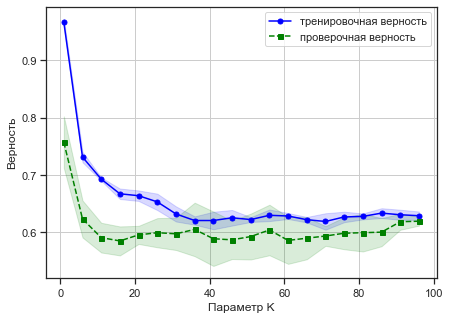

In [58]:
plot_validation_curve(dataMathOver_X_train, dataMathOver_Y_train)

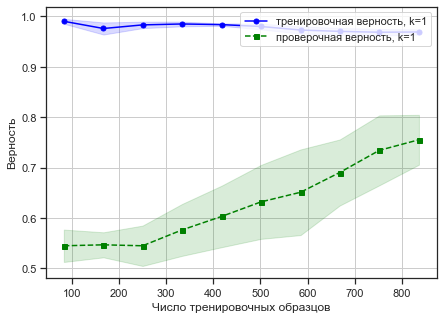

In [59]:
plot_learning_curve(dataMathOver_X_train, dataMathOver_Y_train, n=1)

# 3. Множество объектов - все категориальные признаки и math score кроме gender и test preparation course

In [60]:
dataMath

,math score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch,test preparation course_none
0,0.72,0,1,0,0,0,1,0,0,0,0,1,1
1,0.69,0,0,1,0,0,0,0,0,1,0,1,0
2,0.90,0,1,0,0,0,0,0,1,0,0,1,1
3,0.47,1,0,0,0,0,0,0,0,0,0,0,1
4,0.76,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.88,0,0,0,0,1,0,0,1,0,0,1,0
996,0.62,1,0,1,0,0,0,1,0,0,0,0,1
997,0.59,0,0,1,0,0,0,1,0,0,0,0,0
998,0.68,0,0,0,1,0,0,0,0,1,0,1,0


In [61]:
dataMathGT = dataMath.drop(columns=['gender_male', 'test preparation course_none'])

In [62]:
dataMathGT_X_train, dataMathGT_X_test, dataMathGT_Y_train, dataMathGT_Y_test = get_train_test(dataMathGT)

In [63]:
np.linspace(0.1, 1.0, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Сбалансированная оценка: 0.5613703236654056


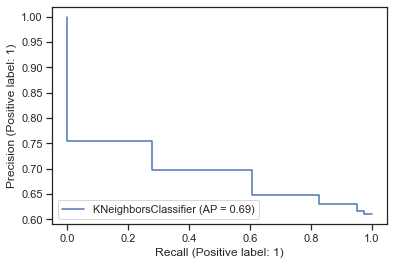

Матрица ошибок:
 [[ 23  55]
 [ 21 101]]
              precision    recall  f1-score   support

free/reduced       0.52      0.29      0.38        78
    standard       0.65      0.83      0.73       122

    accuracy                           0.62       200
   macro avg       0.59      0.56      0.55       200
weighted avg       0.60      0.62      0.59       200



In [64]:
any_res_for_MathGT = print_metrics(dataMathGT_X_train, dataMathGT_Y_train, dataMathGT_X_test, dataMathGT_Y_test)

In [65]:
grid_for_MathGT, REPgrid_for_MathGT, SHUFgrid_for_MathGT = get_res_cross_val(dataMathGT_X_train, dataMathGT_Y_train)


СТРАТЕГИЯ Stratified K-fold
Подобранный параметр: {'n_neighbors': 2}
Оценка при подобранном параметре: 0.6024134199134199

СТРАТЕГИЯ Stratified Repeated K-fold: кол-во поторений: 2
Подобранный параметр: {'n_neighbors': 4}
Оценка при подобранном параметре: 0.5802314352314354

СТРАТЕГИЯ Shuffle Split: кол-во перемешиваний 5 для тестовой выборки с долей 0.2
Подобранный параметр: {'n_neighbors': 4}
Оценка при подобранном параметре: 0.5801185413127101


**K-fold cross validation**

Сбалансированная оценка: 0.6127574611181168


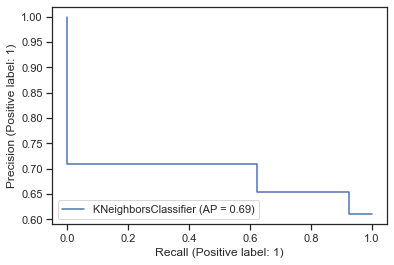

Матрица ошибок:
 [[47 31]
 [46 76]]
              precision    recall  f1-score   support

free/reduced       0.51      0.60      0.55        78
    standard       0.71      0.62      0.66       122

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.63      0.61      0.62       200



In [66]:
t_grid_for_MathGT = print_metrics(dataMathGT_X_train, dataMathGT_Y_train, dataMathGT_X_test, dataMathGT_Y_test, 
                                  K=grid_for_MathGT[0])

**Repeated K-fold cross validation**

Сбалансированная оценка: 0.6293610760823876


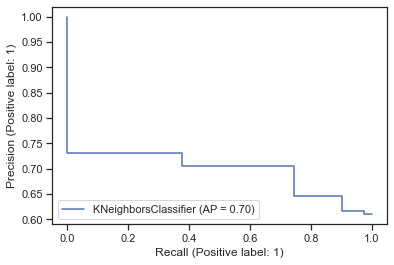

Матрица ошибок:
 [[40 38]
 [31 91]]
              precision    recall  f1-score   support

free/reduced       0.56      0.51      0.54        78
    standard       0.71      0.75      0.73       122

    accuracy                           0.66       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.65      0.66      0.65       200



In [67]:
t_Repeated_grid_for_MathGT = print_metrics(dataMathGT_X_train, dataMathGT_Y_train, dataMathGT_X_test, dataMathGT_Y_test,
                                        K=REPgrid_for_MathGT[0])

**Shuffle Split cross validation**

Сбалансированная оценка: 0.6293610760823876


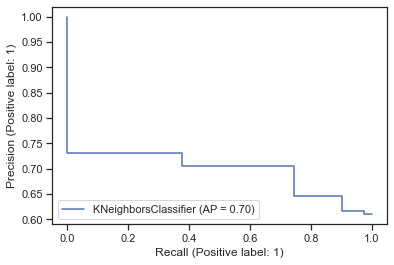

Матрица ошибок:
 [[40 38]
 [31 91]]
              precision    recall  f1-score   support

free/reduced       0.56      0.51      0.54        78
    standard       0.71      0.75      0.73       122

    accuracy                           0.66       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.65      0.66      0.65       200



In [68]:
t_ShuffleSplit_grid_for_MathGT = print_metrics(dataMathGT_X_train, dataMathGT_Y_train, dataMathGT_X_test, dataMathGT_Y_test,
                                            K=SHUFgrid_for_MathGT[0])

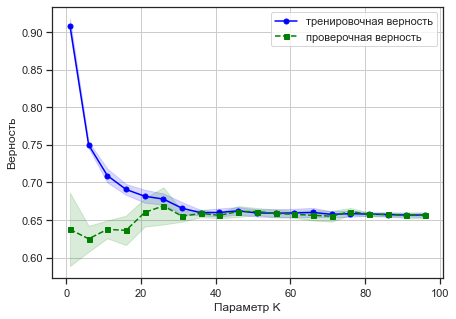

In [69]:
plot_validation_curve(dataMathGT_X_train, dataMathGT_Y_train)

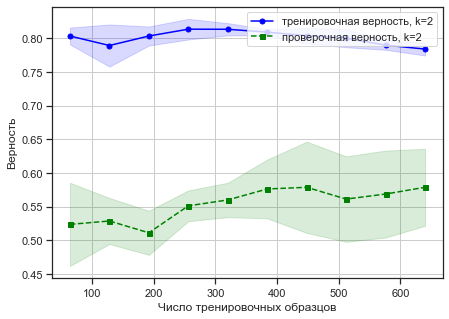

In [70]:
plot_learning_curve(dataMathGT_X_train, dataMathGT_Y_train, n=2)

**Undersampling**

In [71]:
dataMathGTUnder_X_train, dataMathGTUnder_Y_train = get_balance(dataMathGT_X_train, dataMathGT_Y_train, 'under', 1)

Сбалансированная оценка: 0.5860655737704918


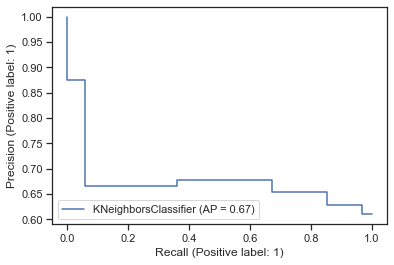

Матрица ошибок:
 [[39 39]
 [40 82]]
              precision    recall  f1-score   support

free/reduced       0.49      0.50      0.50        78
    standard       0.68      0.67      0.67       122

    accuracy                           0.60       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.61      0.60      0.61       200



In [72]:
any_res_for_MathGTUn = print_metrics(dataMathGTUnder_X_train, dataMathGTUnder_Y_train, dataMathGT_X_test, dataMathGT_Y_test)

In [73]:
grid_for_MathGTUn, REPgrid_for_MathGTUn, SHUFgrid_for_MathGTUn = get_res_cross_val(dataMathGTUnder_X_train, 
                                                                             dataMathGTUnder_Y_train, 'accuracy')


СТРАТЕГИЯ K-fold
Подобранный параметр: {'n_neighbors': 2}
Оценка при подобранном параметре: 0.485028665028665

СТРАТЕГИЯ Repeated K-fold: кол-во поторений: 2
Подобранный параметр: {'n_neighbors': 3}
Оценка при подобранном параметре: 0.5803030303030303

СТРАТЕГИЯ Shuffle Split: кол-во перемешиваний 5 для тестовой выборки с долей 0.2
Подобранный параметр: {'n_neighbors': 3}
Оценка при подобранном параметре: 0.5873873873873874


**K-fold cross validation**

Обычная оценка: 0.575


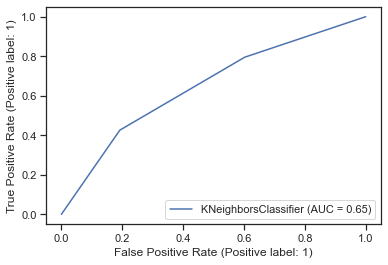

Матрица ошибок:
 [[63 15]
 [70 52]]
              precision    recall  f1-score   support

free/reduced       0.47      0.81      0.60        78
    standard       0.78      0.43      0.55       122

    accuracy                           0.57       200
   macro avg       0.62      0.62      0.57       200
weighted avg       0.66      0.57      0.57       200



In [74]:
t_grid_for_MathGTUn = print_metrics(dataMathGTUnder_X_train, dataMathGTUnder_Y_train, dataMathGT_X_test, dataMathGT_Y_test, 
                                  'accuracy', K=grid_for_MathGTUn[0])

**Repeated K-fold cross validation**

Обычная оценка: 0.645


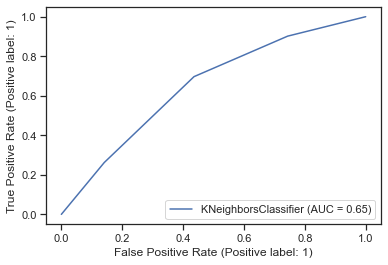

Матрица ошибок:
 [[44 34]
 [37 85]]
              precision    recall  f1-score   support

free/reduced       0.54      0.56      0.55        78
    standard       0.71      0.70      0.71       122

    accuracy                           0.65       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.65      0.65      0.65       200



In [75]:
t_Repeated_grid_for_MathGTUn = print_metrics(dataMathGTUnder_X_train, dataMathGTUnder_Y_train, dataMathGT_X_test, 
                                             dataMathGT_Y_test, 'accuracy', K=REPgrid_for_MathGTUn[0])

**Shuffle Split cross validation**

Обычная оценка: 0.645


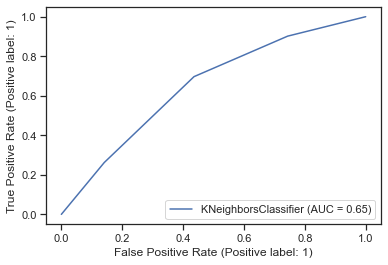

Матрица ошибок:
 [[44 34]
 [37 85]]
              precision    recall  f1-score   support

free/reduced       0.54      0.56      0.55        78
    standard       0.71      0.70      0.71       122

    accuracy                           0.65       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.65      0.65      0.65       200



In [76]:
t_ShuffleSplit_grid_for_MathGTUn = print_metrics(dataMathGTUnder_X_train, dataMathGTUnder_Y_train, dataMathGT_X_test, 
                                                 dataMathGT_Y_test, 'accuracy', K=SHUFgrid_for_MathGTUn[0])

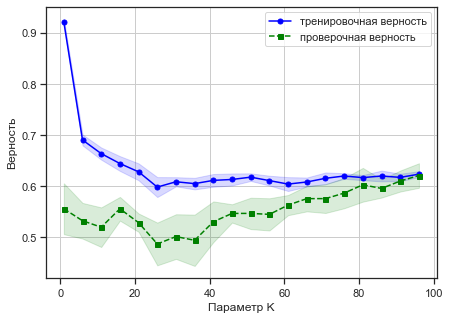

In [77]:
plot_validation_curve(dataMathGTUnder_X_train, dataMathGTUnder_Y_train)

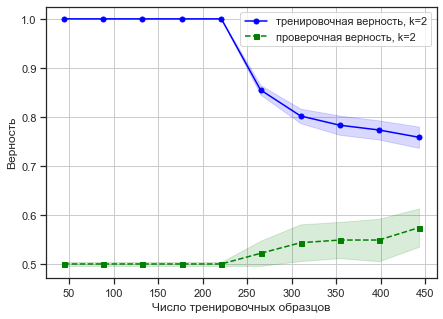

In [78]:
plot_learning_curve(dataMathGTUnder_X_train, dataMathUnder_Y_train, n=2)

# 4. Итоги кросс-валидации

In [79]:
lst_label_cv = ['K-fold', 'Repeated K-fold', 'Shuffle Split']
dc_score = {'Оценка на кросс-валидации':[grid_for_Math[1], REPgrid_for_Math[1], SHUFgrid_for_Math[1]],\
           'Оценка на отложенной выборке':[t_grid_for_Math, t_Repeated_grid_for_Math, \
                                  t_ShuffleSplit_grid_for_Math]}
dc_scoreUn = {'Оценка на кросс-валидации':[grid_for_MathUn[1], REPgrid_for_MathUn[1], SHUFgrid_for_MathUn[1]],\
           'Оценка на отложенной выборке':[t_grid_for_MathUn, t_Repeated_grid_for_MathUn, \
                                  t_ShuffleSplit_grid_for_MathUn]}
dc_scoreOv = {'Оценка на кросс-валидации':[grid_for_MathOv[1], REPgrid_for_MathOv[1], SHUFgrid_for_MathOv[1]],\
           'Оценка на отложенной выборке':[t_grid_for_MathOv, t_Repeated_grid_for_MathOv, \
                                  t_ShuffleSplit_grid_for_MathOv]}
dc_scoreGT = {'Оценка на кросс-валидации':[grid_for_MathGT[1], REPgrid_for_MathGT[1], SHUFgrid_for_MathGT[1]],\
           'Оценка на отложенной выборке':[t_grid_for_MathGT, t_Repeated_grid_for_MathGT, \
                                  t_ShuffleSplit_grid_for_MathGT]}
dc_scoreGTUn = {'Оценка на кросс-валидации':[grid_for_MathGTUn[1], REPgrid_for_MathGTUn[1], SHUFgrid_for_MathGTUn[1]],\
           'Оценка на отложенной выборке':[t_grid_for_MathGTUn, t_Repeated_grid_for_MathGTUn, \
                                  t_ShuffleSplit_grid_for_MathGTUn]}

## 4.1. Все категории и math score

**При произвольном K**

In [80]:
print(f'Accuracy: {any_res_for_Math} при k = {N_DEFAULT}')

Accuracy: 0.4965321563682219 при k = 5


**С кросс-валидацией и GridSearch**

In [81]:
print('Accuracy для кросс-валидации:')
pd.DataFrame(dc_score, index=lst_label_cv)

Accuracy для кросс-валидации:


,Оценка на кросс-валидации,Оценка на отложенной выборке
K-fold,0.577100,0.516183
Repeated K-fold,0.556845,0.529424
Shuffle Split,0.594337,0.516183


## 4.2. Все категории и math_score с undersampling

**При произвольном K**

In [82]:
print(f'Accuracy: {any_res_for_MathUn} при k = {N_DEFAULT}')

Accuracy: 0.515 при k = 5


**С кросс-валидацией и GridSearch**

In [83]:
print('Accuracy для кросс-валидации:')
pd.DataFrame(dc_scoreUn, index=lst_label_cv)

Accuracy для кросс-валидации:


,Оценка на кросс-валидации,Оценка на отложенной выборке
K-fold,0.441785,0.475
Repeated K-fold,0.579517,0.590
Shuffle Split,0.574775,0.650


## 4.3. Все категории и math score с oversampling

**При произвольном K**

In [84]:
print(f'Accuracy: {any_res_for_MathOv} при k = {N_DEFAULT}')

Accuracy: 0.5 при k = 5


**С кросс-валидацией и GridSearch**

In [85]:
print('Accuracy для кросс-валидации:')
pd.DataFrame(dc_scoreOv, index=lst_label_cv)

Accuracy для кросс-валидации:


,Оценка на кросс-валидации,Оценка на отложенной выборке
K-fold,0.748635,0.535
Repeated K-fold,0.730902,0.545
Shuffle Split,0.714286,0.545


## 4.4. Без признаков Gender и Test preparation course

**При произвольном K**

In [86]:
print(f'Accuracy: {any_res_for_MathGT} при k = {N_DEFAULT}')

Accuracy: 0.5613703236654056 при k = 5


**С кросс-валидацией и GridSearch**

In [87]:
print('Accuracy для кросс-валидации:')
pd.DataFrame(dc_scoreGT, index=lst_label_cv)

Accuracy для кросс-валидации:


,Оценка на кросс-валидации,Оценка на отложенной выборке
K-fold,0.602413,0.612757
Repeated K-fold,0.580231,0.629361
Shuffle Split,0.580119,0.629361


## 4.5. Без признаков Gender и Test preparation course с undersampling

**При произвольном K**

In [88]:
print(f'Accuracy: {any_res_for_MathGTUn} при k = {N_DEFAULT}')

Accuracy: 0.5860655737704918 при k = 5


**С кросс-валидацией и GridSearch**

In [89]:
print('Accuracy для кросс-валидации:')
pd.DataFrame(dc_scoreGTUn, index=lst_label_cv)

Accuracy для кросс-валидации:


,Оценка на кросс-валидации,Оценка на отложенной выборке
K-fold,0.485029,0.575
Repeated K-fold,0.580303,0.645
Shuffle Split,0.587387,0.645
